# Instructions
[link](https://www.geog.leeds.ac.uk/courses/computing/study/core-python-phd/assessment2/wind.html)

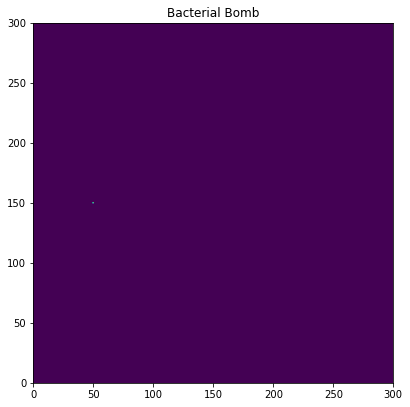

Starting location of the bacterial bomb x= 50 y= 150


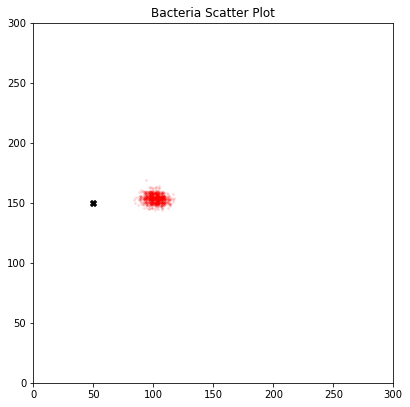

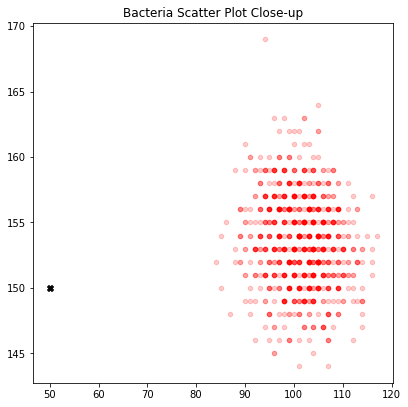

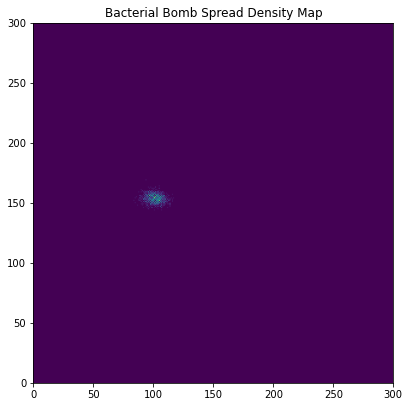

In [24]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 28 09:41:53 2020

@author: Mushtahid
"""
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import random
random.seed(10)
import ipywidgets

bact = []
fin_param = [] # To compare and also store time
b_map = []
no_bact = 1000
no_iter = 1000000000

def news_move (a):
    if 0 < random.random() <= 0.05:
        a[1] -= 1 # Blow west
    elif 0.05 < random.random() <= 0.15:
        a[1] += 1 # Blow north
    elif 0.15 < random.random() <= 0.25:
        a[0] -= 1 # Blow south
    else: #0.25 < rand <= 1
        a[0] += 1 # Blow east

def ud_move(a):
    if random.random() <= 0.1:
        a[2] = bact[i][2] # Stay the same
        
    elif 0.1 < random.random() <= 0.3:
        a[2] += 1 # Rise by 1 metre/second
    
    else: #if 0.3 < rand <= 1
        a[2] -= 1 # Fall by 1 metre/second


with open('wind.raster', newline='') as f:
    map_r = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for row in map_r:
        map_list = []
        for value in row:
            map_list.append(value)
        b_map.append(map_list)
        
fig = plt.figure(figsize=(5, 5))    
ax = fig.add_axes([0, 0, 1, 1])
plt.title('Bacterial Bomb')
plt.ylim(0, 300)
plt.xlim(0, 300)
plt.imshow(b_map);
plt.show()

for i in range(len(b_map)):
    for j in range (len(b_map[i])):
        if b_map[i][j] > 0:
            x0 = j
            y0 = i
print('Starting location of the bacterial bomb', 'x=', x0, 'y=', y0)
z0 = 75

for i in range(no_bact):
    bact.append([x0, y0, z0])
# print(bact)
       
for i in range(no_bact):
    ground = False
    for j in range(no_iter): # 1 iteration = 1 second
   
        if bact[i][2] >= z0: #above the building height         
            ud_move(bact[i])
            news_move(bact[i])
        
        elif 0 < bact[i][2] < z0:
            bact[i][2] -= 1 # Fall by 1 metre/second           
            news_move(bact[i])
        
        else: # if bact[i][2] = 0:   
            bact[i][2] = bact[i][2]
            ground = True
            break # Break and continue to next bacteria!
    
    if ground == True:
        t = j # Time
        xf = bact[i][0] # Final coordinates
        yf = bact[i][1]
        zf = bact[i][2] # To see if working properly
        fin_param.append([i, j, xf, yf, zf]) # Not needed actually
        continue
# print(fin_param)

fig = plt.figure(figsize=(5, 5))    
ax = fig.add_axes([0, 0, 1, 1])
plt.title('Bacteria Scatter Plot')
plt.ylim(0, 300)
plt.xlim(0, 300)
plt.scatter(x0,y0, marker='X',color='black')
for i in range(no_bact):
    plt.scatter(bact[i][0], bact[i][1], s=3, color='red', alpha=0.1)
plt.show()

fig = plt.figure(figsize=(5, 5))    
ax = fig.add_axes([0, 0, 1, 1])
plt.title('Bacteria Scatter Plot Close-up')
# plt.ylim(0, 300)
# plt.xlim(0, 300)
plt.scatter(x0,y0, marker='X',color='black')
for i in range(no_bact):
    plt.scatter(bact[i][0], bact[i][1], s=20, color='red', alpha=0.2)
plt.show()

# plt.title('Bacteria Density Map 3')
# # plt.ylim(0, 300)
# # plt.xlim(0, 300)
# for i in range(no_bact):
#     plt.scatter(bact[i][0], bact[i][1], s=20, color='red', alpha=0.1)
# plt.show()

# plt.title('Bacteria Density Map 4')
# # plt.ylim(0, 300)
# # plt.xlim(0, 300)
# for i in range(no_bact):
#     plt.scatter(fin_param[i][2], fin_param[i][3], s=20, color='red', alpha=0.1)
# plt.show()

# Create density map
den_map = []
for i in range(300):
    dm2 = []
    for j in range(300):
        dm2.append(0)
    den_map.append(dm2)
    
# print(den_map)
# print(len(den_map))
# print(len(den_map[0]))

for i in range(len(bact)):
    x = bact[i][0]
    y = bact[i][1]
    den_map[y][x] += 1
# print(den_map)

fig = plt.figure(figsize=(5, 5))    
ax = fig.add_axes([0, 0, 1, 1])
plt.title('Bacterial Bomb Spread Density Map')
plt.ylim(0, 300)
plt.xlim(0, 300)
plt.imshow(den_map);

# Save bacterial spread density map as a csv file
with open('bac_den_map.csv', 'w', newline='') as f:     
   den_m_w = csv.writer(f)     
   for row in den_map:         
        den_m_w.writerow(row)
        
# Read the saved map to compare
# d2 = []
# with open('bac_den_map.csv', newline='') as f:
#     d2_r = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
#     for row in d2_r:
#         dm2 = []
#         for value in row:
#             dm2.append(value)
#         d2.append(dm2)
# # print('Death2', d2)
# # print(len(d2))
# # print(len(d2[0]))
# print(den_map == d2)


# Trying out interaction

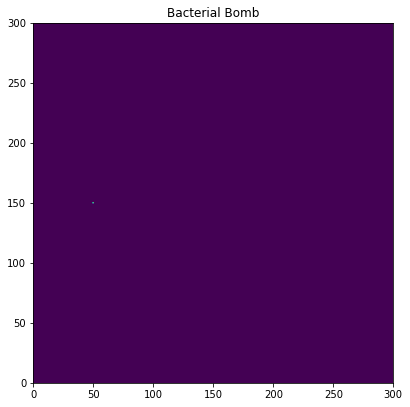

Starting location of the bacterial bomb x: 50 y: 150


interactive(children=(IntSlider(value=1000, description='Bacteria Number', max=10000, min=10, step=100), IntSl…

In [36]:
# %matplotlib inline
import matplotlib.pyplot as plt
import csv
import random
random.seed(10)
import ipywidgets as widgets
from IPython.display import display # Maybe not needed
import seaborn as sns

b_map = []
bact = []
den_map = []
fin_param = []
no_iter = 1000000000

# Read bacterial bomb file
with open('wind.raster', newline='') as f:
    map_r = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for row in map_r:
        map_list = []
        for value in row:
            map_list.append(value)
        b_map.append(map_list)

# Display bacteria bomb initial density map
fig = plt.figure(figsize=(5, 5))    
ax = fig.add_axes([0, 0, 1, 1])
plt.title('Bacterial Bomb')
plt.ylim(0, 300)
plt.xlim(0, 300)
plt.imshow(b_map)
plt.show();

# Find location of bacterial bomb
for i in range(len(b_map)):
    for j in range (len(b_map[i])):
        if b_map[i][j] > 0:
            x0 = j
            y0 = i
print('Starting location of the bacterial bomb', 'x:', x0, 'y:', y0)

def bdmint(no_bact, z0, pns, pn, pw, pud, pu):      
    
    # Clear lists before running again
    bact.clear()
    den_map.clear()
    fin_param.clear()
    
    # Set up north-east-west-south movement function
    def news_move(a):
        if random.random() <= pns: # probability of moving north or south
            if random.random() <= pn:
                a[1] += 1 # Blow north
            else:
            # elif random.random() <= ps:
                a[1] -= 1 # Blow south
        else: # if random > pns
            if random.random() <= pw:
                a[0] -= 1 # Blow west
            else: # if rand > pw
            # elif random.random() <= pe:
                a[0] += 1 # Blow east
    
    # up_down movement function
    def ud_move(a):
        if random.random() <= pud: # prob of moving up or down if height >= z0
            if random.random() <= pu:
                a[2] += 1 # Rise by 1 metre/second
            
            else: # if random > pu
            # elif random.random() <= pd:
                a[2] -= 1 # Fall by 1 metre/second
                
        else: # if random > pud
            a[2] = a[2] # Stay the same
    
    # Print Initial Conditions
    print('Model is run with the following settings:')
    print(f'1) Bacteria number: {no_bact}')
    print(f'2) Building Height: {z0}m')
    print(f'3.a) P North/South: {pns:.2f}')
    print(f'---> P North: {pn:.2f}, P South: {1-pn:.2f}')
    print(f'3.b) P West/East: {1-pns:.2f}')
    print(f'---> P West: {pw:.2f}, P East: {1-pw:.2f}')
    print(f'4.a) P Up/Down: {pud:.2f} (If bacteria >= {z0}m)')
    print(f'---> P Up: {pu:.2f}, P Down: {1-pu:.2f}') 
    print(f'4.b) P Stay Same: {1-pud:.2f} (If bacteria >= {z0}m)')
    
    # Create Bacteria
    for i in range(no_bact):
        bact.append([x0, y0, z0])
    # print(bact)
    
    # Bomb detonation
    for i in range(no_bact):
        ground = False
        for j in range(no_iter): # 1 iteration = 1 second

            if bact[i][2] >= z0: #above the building height         
                ud_move(bact[i])
                news_move(bact[i])

            elif 0 < bact[i][2] < z0:
                bact[i][2] -= 1 # Fall by 1 metre/second           
                news_move(bact[i])

            else: # if bact[i][2] = 0:   
                bact[i][2] = bact[i][2]
                ground = True
                break # Break as already hit the ground!

        if ground == True:
            t = j # Time
            xf = bact[i][0] # Final coordinates
            yf = bact[i][1]
            zf = bact[i][2] # To see if working properly
            fin_param.append([i, j, xf, yf, zf]) # Not needed actually but to store time and count (i) as well
            continue # continue to next bacteria
    # print(fin_param)
    
    # Create new density map
    for i in range(300):
        dm2 = []
        for j in range(300):
            dm2.append(0)
        den_map.append(dm2)

    for i in range(len(bact)):
        x = bact[i][0]
        y = bact[i][1]
        den_map[y][x] += 1
    # print(den_map)
    # print(len(den_map))
    # print(len(den_map[0]))
    
    # Find most concentrated from the new density map.
    most_con = 0
    for i in range(len(den_map)):
        for j in range (len(den_map[i])):
            if den_map[i][j] > most_con:
                most_con = den_map[i][j]
                x_m = j
                y_m = i
    print('')
    print('Model results:')
    print(f'Most number ({most_con}) of bacteria deposited at x: {x_m}, y {y_m} within the {len(den_map)}X{len(den_map[0])}m2 area of the town')
    
    # Plot bacteria scatter plot after spread and landing
    fig = plt.figure(figsize=(5, 5))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacteria Scatter Plot')
    plt.ylim(0, 300)
    plt.xlim(0, 300)
    plt.scatter(x0,y0, marker='x',color='black')
    for i in range(no_bact):
        plt.scatter(bact[i][0], bact[i][1], s=3, marker=',', color='red', alpha=0.1)
    plt.scatter(x_m,y_m, marker='+',color='black')
    plt.show()
    
    # Plot full bacterial scatter plot
    fig = plt.figure(figsize=(5, 5))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacteria Scatter Plot Full')
    # plt.ylim(0, 300)
    # plt.xlim(0, 300)
    plt.scatter(x0,y0, marker='X',color='black')
    for i in range(no_bact):
        plt.scatter(bact[i][0], bact[i][1], marker=',', color='red', alpha=0.2)
    plt.scatter(x_m,y_m, marker='+',color='black')
    plt.show()
    
    # Display new bacterial density map
    fig = plt.figure(figsize=(5, 5))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacterial Bomb Spread Density Map')
    plt.ylim(0, 300)
    plt.xlim(0, 300)
    plt.imshow(den_map)
    plt.show();
      
    # Save bacterial spread density map as a csv file
    with open('bac_den_map.csv', 'w', newline='') as f:     
       den_m_w = csv.writer(f)     
       for row in den_map:         
            den_m_w.writerow(row)
    
    min_y = min(bact, key=lambda x: x[1])
    print('min_y', min_y)
    max_y = max(bact, key=lambda x: x[1])
    print('max_y', max_y)
    min_x = min(bact, key=lambda x: x[0])
    print('min_x', min_x)
    max_x = max(bact, key=lambda x: x[0])
    print('max_x', max_x)
    
    # Print final coordinates of the bacteria after landing
    for i in range(no_bact):
        print(f'x,y,z: {bact[i]}')
    
    # Print final coordinates of the bacteria after landing
    for i in range(no_bact):
        print(f'{i}, time(seconds), x , y, z: {fin_param[i]}')
    
# Set up slider widgets
bac_wg = widgets.IntSlider(description='Bacteria Number', min=10, max=10000, step=100, value=1000)
z_wg = widgets.IntSlider(description='Building Height', min=5, max=150, step=10, value=75)

pns_wg = widgets.FloatSlider(description='P North/South', min=0.0, max=1.0, step=0.05, value=0.2)
pn_wg = widgets.FloatSlider(description='P North', min=0.0, max=1.0, step=0.05, value=0.5)
pw_wg = widgets.FloatSlider(description='P West', min=0.0, max=1.0, step=0.05, value=0.0625)

pud_wg = widgets.FloatSlider(description='P Up/Down', min=0.0, max=1.0, step=0.05, value=0.9)
pu_wg = widgets.FloatSlider(description='P Up', min=0.0, max=1.0, step=0.05, value=0.222)

widgets.interact_manual.opts['manual_name'] = 'Run Model'                   
widgets.interact_manual(bdmint, no_bact=bac_wg, z0=z_wg, pns=pns_wg, pn=pn_wg, pw=pw_wg, pud=pud_wg, pu=pu_wg);

In [ ]:
def bdmint(no_bact=100, pw=0.05, pn=0.15, ps=0.25, pe=1.0, psm=0.1, pu=0.3, pd=1.0):                       
widgets.interact_manual(bdmint,no_bact=bac_wg, pw=pw_wg, pn=pn_wg, ps=ps_wg, pe=pe_wg, psm=psm_wg, pu=pu_wg, pd=pd_wg);

In [ ]:
    # Set up north-east-west-south movement function
    def news_move (a):
        if 0 < random.random() <= pw:
            a[1] -= 1 # Blow west
        elif pw < random.random() <= pn:
            a[1] += 1 # Blow north
        elif pn < random.random() <= ps:
            a[0] -= 1 # Blow south
        elif ps < random.random() <= pe:
            a[0] += 1 # Blow east
#         else: #0.25 < rand <= 1
#             a[0] += 1 # Blow east
    
    # up_down movement function
    def ud_move(a): 
        if random.random() <= psm:
            a[2] = a[2] # Stay the same

        elif psm < random.random() <= pu:
            a[2] += 1 # Rise by 1 metre/second
        
        elif pu < random.random() <= pd:
            a[2] -= 1 # Fall by 1 metre/second
#         else: #if pu < rand <= 1
#             a[2] -= 1 # Fall by 1 metre/second

In [ ]:
    # Set up north-east-west-south movement function
    def news_move (a):
        if random.random() <= pw:
            a[1] -= 1 # Blow west
        elif random.random() <= pn:
            a[1] += 1 # Blow north
        elif random.random() <= ps:
            a[0] -= 1 # Blow south
        elif random.random() <= pe:
            a[0] += 1 # Blow east
#         else: #0.25 < rand <= 1
#             a[0] += 1 # Blow east
    
    # up_down movement function
    def ud_move(a): 
        if random.random() <= psm:
            a[2] = a[2] # Stay the same

        elif random.random() <= pu:
            a[2] += 1 # Rise by 1 metre/second
        
        elif random.random() <= pd:
            a[2] -= 1 # Fall by 1 metre/second
#         else: #if pu < rand <= 1
#             a[2] -= 1 # Fall by 1 metre/second

bac_wg = widgets.IntSlider(description='Bacteria Number', min=100, max=10000, step=100, value=1000, continuous_update=False)
    
pw_wg = widgets.FloatSlider(description='P West', min=0.0, max=0.05, step=0.05, value=0.05)
pn_wg = widgets.FloatSlider(description='P North', min=0.0, max=0.15, step=0.05, value=0.15)
ps_wg = widgets.FloatSlider(description='P South', min=0.0, max=0.25, step=0.05, value=0.25)
pe_wg = widgets.FloatSlider(description='P East', min=0.0, max=1.0, step=0.05, value=1.0)

psm_wg = widgets.FloatSlider(description='P Same', min=0.0, max=0.1, step=0.05, value=0.1)
pu_wg = widgets.FloatSlider(description='P Up', min=0.0, max=0.2, step=0.05, value=0.2)
pd_wg = widgets.FloatSlider(description='P Down', min=0.0, max=0.7, step=0.05, value=0.7)

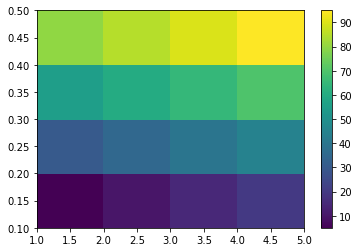

In [10]:
min_y [93, 142, 0]
max_y [103, 156, 0]
min_x [93, 142, 0]
max_x [105, 150, 0]
x,y,z: [103, 154, 0]
x,y,z: [95, 150, 0]
x,y,z: [105, 150, 0]
x,y,z: [103, 153, 0]
x,y,z: [103, 144, 0]
x,y,z: [93, 142, 0]
x,y,z: [104, 147, 0]
x,y,z: [105, 150, 0]
x,y,z: [103, 156, 0]
x,y,z: [102, 145, 0]
0, time(seconds), x , y, z: [0, 75, 103, 154, 0]
1, time(seconds), x , y, z: [1, 75, 95, 150, 0]
2, time(seconds), x , y, z: [2, 75, 105, 150, 0]
3, time(seconds), x , y, z: [3, 78, 103, 153, 0]
4, time(seconds), x , y, z: [4, 75, 103, 144, 0]
5, time(seconds), x , y, z: [5, 75, 93, 142, 0]
6, time(seconds), x , y, z: [6, 75, 104, 147, 0]
7, time(seconds), x , y, z: [7, 75, 105, 150, 0]
8, time(seconds), x , y, z: [8, 75, 103, 156, 0]
9, time(seconds), x , y, z: [9, 75, 102, 145, 0]
    
2

min_y [93, 142, 0]
max_y [103, 156, 0]
min_x [93, 142, 0]
max_x [105, 150, 0]
x,y,z: [103, 154, 0]
x,y,z: [95, 150, 0]
x,y,z: [105, 150, 0]
x,y,z: [103, 153, 0]
x,y,z: [103, 144, 0]
x,y,z: [93, 142, 0]
x,y,z: [104, 147, 0]
x,y,z: [105, 150, 0]
x,y,z: [103, 156, 0]
x,y,z: [102, 145, 0]
0, time(seconds), x , y, z: [0, 75, 103, 154, 0]
1, time(seconds), x , y, z: [1, 75, 95, 150, 0]
2, time(seconds), x , y, z: [2, 75, 105, 150, 0]
3, time(seconds), x , y, z: [3, 78, 103, 153, 0]
4, time(seconds), x , y, z: [4, 75, 103, 144, 0]
5, time(seconds), x , y, z: [5, 75, 93, 142, 0]
6, time(seconds), x , y, z: [6, 75, 104, 147, 0]
7, time(seconds), x , y, z: [7, 75, 105, 150, 0]
8, time(seconds), x , y, z: [8, 75, 103, 156, 0]
9, time(seconds), x , y, z: [9, 75, 102, 145, 0]
    
2.1 
min_y [114, 147, 0]
max_y [99, 158, 0]
min_x [98, 149, 0]
max_x [114, 147, 0]
x,y,z: [114, 147, 0]
x,y,z: [98, 149, 0]
x,y,z: [99, 158, 0]
x,y,z: [107, 152, 0]
x,y,z: [105, 156, 0]
x,y,z: [108, 152, 0]
x,y,z: [101, 150, 0]
x,y,z: [102, 150, 0]
x,y,z: [112, 148, 0]
x,y,z: [99, 150, 0]
0, time(seconds), x , y, z: [0, 75, 114, 147, 0]
1, time(seconds), x , y, z: [1, 75, 98, 149, 0]
2, time(seconds), x , y, z: [2, 75, 99, 158, 0]
3, time(seconds), x , y, z: [3, 75, 107, 152, 0]
4, time(seconds), x , y, z: [4, 75, 105, 156, 0]
5, time(seconds), x , y, z: [5, 80, 108, 152, 0]
6, time(seconds), x , y, z: [6, 75, 101, 150, 0]
7, time(seconds), x , y, z: [7, 76, 102, 150, 0]
8, time(seconds), x , y, z: [8, 76, 112, 148, 0]
9, time(seconds), x , y, z: [9, 75, 99, 150, 0]

# Changing it to while condition

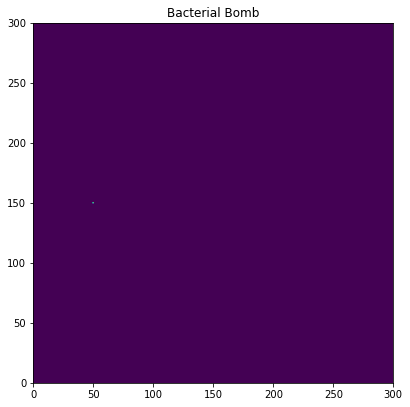

Starting location of the bacterial bomb (x: 50, y: 150)


interactive(children=(IntSlider(value=1000, description='Bacteria Number', max=10000, min=10), IntSlider(value…

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import random
random.seed(10)
import ipywidgets as widgets
from IPython.display import display # Maybe not needed
import seaborn as sns

# Set up north-east-west-south movement function
def news_move(a, pns, pn, pw):
    if random.random() <= pns: # probability of moving north or south
        if random.random() <= pn:
            a[1] += 1 # Blow north
        else:
        # elif random.random() <= ps:
            a[1] -= 1 # Blow south
    else: # if random > pns
        if random.random() <= pw:
            a[0] -= 1 # Blow west
        else: # if rand > pw
        # elif random.random() <= pe:
            a[0] += 1 # Blow east

# up_down movement function
def ud_move(a, pud, pu):
    if random.random() <= pud: # prob of moving up or down if height >= z0
        if random.random() <= pu:
            a[2] += 1 # Rise by 1 metre/second

        else: # if random > pu
        # elif random.random() <= pd:
            a[2] -= 1 # Fall by 1 metre/second

    else: # if random > pud
        a[2] = a[2] # Stay the same

b_map = []
bact = []
den_map = []
den_map2 = []
fin_param = []
most_con = 0
x_m = 0
y_m = 0

# Read bacterial bomb file
with open('wind.raster', newline='') as f:
    map_r = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for row in map_r:
        map_list = []
        for value in row:
            map_list.append(value)
        b_map.append(map_list)

# Display bacteria bomb initial density map
fig = plt.figure(figsize=(5, 5))    
ax = fig.add_axes([0, 0, 1, 1])
plt.title('Bacterial Bomb')
plt.ylim(0, 300)
plt.xlim(0, 300)
plt.imshow(b_map)
plt.show();

# Find location of bacterial bomb
for i in range(len(b_map)):
    for j in range (len(b_map[i])):
        if b_map[i][j] > 0:
            x0 = j
            y0 = i
print(f'Starting location of the bacterial bomb (x: {x0}, y: {y0})')

def bdmint(no_bact, z0, pns, pn, pw, pud, pu):      
    
    # Clear lists before running again
    bact.clear()
    den_map.clear()
    den_map2.clear()
    fin_param.clear()
    
    # Print Initial Conditions
    print('Model is run with the following settings:')
    print(f'1) Bacteria number: {no_bact}')
    print(f'2) Building Height: {z0}m')
    print(f'3.a) P North/South: {pns:.2f}')
    print(f'---> P North: {pn:.2f}, P South: {1-pn:.2f}')
    print(f'3.b) P West/East: {1-pns:.2f}')
    print(f'---> P West: {pw:.2f}, P East: {1-pw:.2f}')
    print(f'4.a) P Up/Down: {pud:.2f} (If bacteria >= {z0}m)')
    print(f'---> P Up: {pu:.2f}, P Down: {1-pu:.2f}') 
    print(f'4.b) P Stay Same: {1-pud:.2f} (If bacteria >= {z0}m)')
    
    # Create Bacteria bomb
    for i in range(no_bact):
        bact.append([x0, y0, z0])
    # print(bact)
    
    # Bomb detonation
    for i in range(no_bact):
        carry_on = True
        it = 0 # -1 is not used because I don't want to count 0 for time
        while carry_on: # 1 it = 1 second
            it += 1
            if bact[i][2] >= z0: #above the building height         
                ud_move(bact[i], pud, pu)
                news_move(bact[i], pns, pn, pw)

            elif 0 < bact[i][2] < z0:
                bact[i][2] -= 1 # Fall by 1 metre/second           
                news_move(bact[i], pns, pn, pw)

            else: # if bact[i][2] = 0:   
                bact[i][2] = bact[i][2]
                carry_on = False
                # break # Break as already hit the ground! # Not needed with while loop

        if carry_on == False:
            xf = bact[i][0] # Final coordinates
            yf = bact[i][1]
            zf = bact[i][2] # To see if working properly (if all landed to ground)
            fin_param.append([i, it, xf, yf, zf]) # Not needed actually but to store time (it) and count (i) as well
            # continue # continue to next bacteria # Not needed with while loop
    # print(fin_param)
    
    # Create new density map
    for i in range(300):
        dm2 = []
        for j in range(300):
            dm2.append(0)
        den_map.append(dm2)
    for i in range(len(bact)):
        x = bact[i][0]
        y = bact[i][1]
        den_map[y][x] += 1
    # print(den_map)
    # print(len(den_map))
    # print(len(den_map[0]))
    
    # Trying to eliminate more than 300X300
    # Create new density map 2
    for i in range(300):
        dm2 = []
        for j in range(300):
            dm2.append(0)
        den_map2.append(dm2)
    for i in range(len(bact)):
        if (0 <= bact[i][0] <= len(den_map2[0])) and (0 <= bact[i][1] <= len(den_map2)):
            x = bact[i][0]
            y = bact[i][1]
            den_map2[y][x] += 1
    
    # Find most concentrated from the new density map.
    global most_con
    global x_m
    global y_m
    most_con = 0
    x_m = 0
    y_m = 0
    for i in range(len(den_map)):
        for j in range (len(den_map[i])):
            if den_map[i][j] > most_con:
                most_con = den_map[i][j]
                x_m = j
                y_m = i
    print('')
    print('Model results:')
    print(f'Most number ({most_con}) of bacteria deposited at x: {x_m}, y {y_m} within the {len(den_map)}X{len(den_map[0])}m2 area of the town')
    
    # for den map 2 most conc area
    m2 = 0
    for i in range(len(den_map2)):
        for j in range (len(den_map2[i])):
            if den_map2[i][j] > m2:
                m2 = den_map2[i][j]
                x_m2 = j
                y_m2 = i
    print('')
    print('Model results2:')
    print(f'Most number ({m2}) of bacteria deposited at x: {x_m2}, y {y_m2} within the {len(den_map2)}X{len(den_map2[0])}m2 area of the town')
    
    # Plot bacteria scatter plot after spread and landing
    fig = plt.figure(figsize=(5, 5))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacteria Scatter Plot')
    plt.ylim(0, 300)
    plt.xlim(0, 300)
    plt.scatter(x0, y0, marker='X',color='blue') # original location of bomb
    for i in range(no_bact):
        plt.scatter(bact[i][0], bact[i][1], s=3, marker=',', color='red', alpha=0.1)
    plt.scatter(x_m, y_m, marker='x', color='yellow') # most_concentrated bacterial drop in the 300X300m2 town
    plt.scatter(x_m2, y_m2, marker='x', color='green') # most conc for den map 2
    plt.show()
    
    # Plot full bacterial scatter plot
    fig = plt.figure(figsize=(5, 5))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacteria Scatter Plot Full')
    # plt.ylim(0, 300)
    # plt.xlim(0, 300)
    plt.scatter(x0, y0, marker='X',color='blue')
    for i in range(no_bact):
        plt.scatter(bact[i][0], bact[i][1], marker=',', color='red', alpha=0.2)
    plt.scatter(x_m, y_m, marker='x', color='yellow') # most_concentrated bacterial drop in the 300X300m2 town
    plt.scatter(x_m2, y_m2, marker='x', color='green') # most conc for den map 2
    plt.show()
    
    # Display new bacterial density map
    fig = plt.figure(figsize=(10, 10))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacterial Bomb Spread Density Map')
    plt.ylim(0, 300)
    plt.xlim(0, 300)
    plt.imshow(den_map)
    plt.show();
    
    # Display new bacterial density map 2
    fig = plt.figure(figsize=(10, 10))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacterial Bomb Spread Density Map 2')
    plt.ylim(0, 300)
    plt.xlim(0, 300)
    plt.imshow(den_map2)
    plt.show();
      
    # Save bacterial spread density map as a csv file
    with open('bac_den_map.csv', 'w', newline='') as f:     
       den_m_w = csv.writer(f)     
       for row in den_map:         
            den_m_w.writerow(row)
            
#     # Find the min and max in each direction    
#     min_y = min(bact, key=lambda x: x[1])
#     print('min_y', min_y)
#     max_y = max(bact, key=lambda x: x[1])
#     print('max_y', max_y)
#     min_x = min(bact, key=lambda x: x[0])
#     print('min_x', min_x)
#     max_x = max(bact, key=lambda x: x[0])
#     print('max_x', max_x)
    
#     # Print final coordinates of the bacteria after landing using bact list
#     for i in range(no_bact):
#         print(f'x,y,z: {bact[i]}')
    
#     # Print final coordinates of the bacteria after landing using fin_param list
#     for i in range(no_bact):
#         print(f'{i}, time(seconds), x , y, z: {fin_param[i]}')
#     for i in range(len(fin_param)): #using fin_param length range
#         print(f'Bacteria {fin_param[i][0]}: Time(sec): {fin_param[i][1]}, '\
#               f'x: {fin_param[i][2]}, '\
#               f'y: {fin_param[i][3]}, '\
#               f'z: {fin_param[i][4]}')
    
# Set up slider widgets
bac_wg = widgets.IntSlider(description='Bacteria Number', min=10, max=10000, step=1, value=1000)
z_wg = widgets.IntSlider(description='Building Height', min=5, max=150, step=5, value=75)

pns_wg = widgets.FloatSlider(description='P North/South', min=0.0, max=1.0, step=0.05, value=0.2)
pn_wg = widgets.FloatSlider(description='P North', min=0.0, max=1.0, step=0.05, value=0.5)
pw_wg = widgets.FloatSlider(description='P West', min=0.0, max=1.0, step=0.05, value=0.0625)

pud_wg = widgets.FloatSlider(description='P Up/Down', min=0.0, max=1.0, step=0.05, value=0.9)
pu_wg = widgets.FloatSlider(description='P Up', min=0.0, max=1.0, step=0.05, value=0.222)

widgets.interact_manual.opts['manual_name'] = 'Run Model'                   
widgets.interact_manual(bdmint, no_bact=bac_wg, z0=z_wg, pns=pns_wg, pn=pn_wg, pw=pw_wg, pud=pud_wg, pu=pu_wg);

In [45]:
# for i in range (len(fin_param)):
#     print(f'Bacteria {fin_param[i][0]}: Time(sec): {fin_param[i][1]}, '\
#           f'x: {fin_param[i][2]}, '\
#           f'y: {fin_param[i][3]}, '\
#           f'z: {fin_param[i][4]}')

In [33]:
bact_count = 0 # not -1 as I don't want to count 0
for i in range (len(fin_param)):
    if (0 <= fin_param[i][2] <= len(den_map[0])) and (0 <= fin_param[i][3] <= len(den_map)):
        bact_count += 1
        print(f'Bacteria {fin_param[i][0]}: Time(sec): {fin_param[i][1]}, '\
              f'x: {fin_param[i][2]}, '\
              f'y: {fin_param[i][3]}, '\
              f'z: {fin_param[i][4]}')
print(f'A total of {bact_count} landed within the 300X300m2 area of the town')

Bacteria 11: Time(sec): 91, x: 2, y: 148, z: 0
Bacteria 21: Time(sec): 91, x: 10, y: 144, z: 0
Bacteria 90: Time(sec): 91, x: 4, y: 156, z: 0
Bacteria 128: Time(sec): 91, x: 1, y: 151, z: 0
Bacteria 133: Time(sec): 91, x: 2, y: 150, z: 0
Bacteria 230: Time(sec): 93, x: 0, y: 150, z: 0
Bacteria 327: Time(sec): 91, x: 0, y: 152, z: 0
Bacteria 342: Time(sec): 91, x: 9, y: 151, z: 0
Bacteria 369: Time(sec): 91, x: 0, y: 148, z: 0
Bacteria 374: Time(sec): 91, x: 1, y: 149, z: 0
Bacteria 394: Time(sec): 91, x: 0, y: 148, z: 0
Bacteria 406: Time(sec): 91, x: 0, y: 150, z: 0
Bacteria 451: Time(sec): 93, x: 0, y: 148, z: 0
Bacteria 454: Time(sec): 91, x: 0, y: 158, z: 0
Bacteria 482: Time(sec): 94, x: 1, y: 144, z: 0
Bacteria 502: Time(sec): 91, x: 0, y: 156, z: 0
Bacteria 597: Time(sec): 91, x: 0, y: 156, z: 0
Bacteria 685: Time(sec): 92, x: 3, y: 146, z: 0
Bacteria 688: Time(sec): 91, x: 2, y: 152, z: 0
Bacteria 719: Time(sec): 91, x: 3, y: 147, z: 0
Bacteria 839: Time(sec): 91, x: 0, y: 146,

In [50]:
sort_fp = sorted(fin_param, key=lambda x: x[1])
# print(sort_fp)

In [51]:
print('Model results:')
print(f'Most number ({most_con}) of bacteria deposited at (x: {x_m}, y: {y_m}) within the {len(den_map)}X{len(den_map[0])}m2 area of the town')
# # Print out details of each bateria sorted according to time taken to land to ground
# for i in range(len(sort_fp)):
#     print(f'Bacteria {sort_fp[i][0]}: Time(sec): {sort_fp[i][1]}, '\
#           f'x: {sort_fp[i][2]}, '\
#           f'y: {sort_fp[i][3]}, '\
#           f'z: {sort_fp[i][4]}')

Model results:
Most number (20) of bacteria deposited at (x: 102, y: 151) within the 300X300m2 area of the town


In [52]:
print('Model results:')
print(f'Most number ({most_con}) of bacteria deposited at (x: {x_m}, y: {y_m}) within the {len(den_map)}X{len(den_map[0])}m2 area of the town')
# trying to print within 300X300
# # Print out details of each bateria sorted according to time taken to land to ground
for i in range(len(sort_fp)):
    if (0 <= sort_fp[i][2] <= len(den_map[0])) and (0 <= sort_fp[i][3] <= len(den_map)):
        print(f'Bacteria {sort_fp[i][0]}: Time(sec): {sort_fp[i][1]}, '\
              f'x: {sort_fp[i][2]}, '\
              f'y: {sort_fp[i][3]}, '\
              f'z: {sort_fp[i][4]}')

Bacteria 0: Time(sec): 76, x: 103, y: 154, z: 0
Bacteria 1: Time(sec): 76, x: 95, y: 150, z: 0
Bacteria 2: Time(sec): 76, x: 105, y: 150, z: 0
Bacteria 4: Time(sec): 76, x: 103, y: 144, z: 0
Bacteria 5: Time(sec): 76, x: 93, y: 142, z: 0
Bacteria 6: Time(sec): 76, x: 104, y: 147, z: 0
Bacteria 7: Time(sec): 76, x: 105, y: 150, z: 0
Bacteria 8: Time(sec): 76, x: 103, y: 156, z: 0
Bacteria 9: Time(sec): 76, x: 102, y: 145, z: 0
Bacteria 10: Time(sec): 76, x: 114, y: 147, z: 0
Bacteria 11: Time(sec): 76, x: 98, y: 149, z: 0
Bacteria 12: Time(sec): 76, x: 99, y: 158, z: 0
Bacteria 13: Time(sec): 76, x: 107, y: 152, z: 0
Bacteria 14: Time(sec): 76, x: 105, y: 156, z: 0
Bacteria 16: Time(sec): 76, x: 101, y: 150, z: 0
Bacteria 19: Time(sec): 76, x: 99, y: 150, z: 0
Bacteria 20: Time(sec): 76, x: 104, y: 151, z: 0
Bacteria 21: Time(sec): 76, x: 107, y: 150, z: 0
Bacteria 22: Time(sec): 76, x: 96, y: 149, z: 0
Bacteria 23: Time(sec): 76, x: 109, y: 156, z: 0
Bacteria 25: Time(sec): 76, x: 103,

In [53]:
# for i in range(len(sort_fp)):
#     if (0 <= sort_fp[i][2] <= len(den_map[0])) and (0 <= sort_fp[i][3] <= len(den_map)):
#         output = open('ouutput.txt', 'a')
#         output.write(f'Bacteria {sort_fp[i][0]}: Time(sec): {sort_fp[i][1]}, '\
#                      f'x: {sort_fp[i][2]}, '\
#                      f'y: {sort_fp[i][3]}, '\
#                      f'z: {sort_fp[i][4]}.')
#         output.close()

# Finalising the code

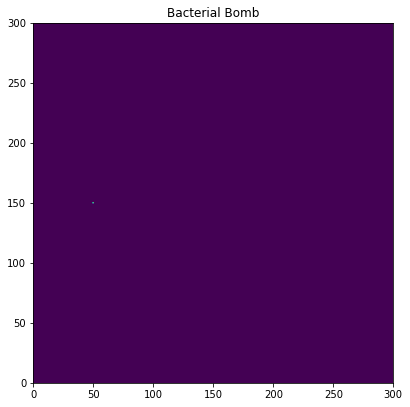

Starting location of the bacterial bomb (x: 50, y: 150)


interactive(children=(IntSlider(value=1000, description='Bacteria Number', max=10000, min=10), IntSlider(value…

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import random
random.seed(10)
import ipywidgets as widgets
from IPython.display import display # Maybe not needed
import seaborn as sns

# Set up north-east-west-south movement function
def news_move(a, pns, pn, pw):
    if random.random() <= pns: # probability of moving north or south
        if random.random() <= pn:
            a[1] += 1 # Blow north
        else:
        # elif random.random() <= ps:
            a[1] -= 1 # Blow south
    else: # if random > pns
        if random.random() <= pw:
            a[0] -= 1 # Blow west
        else: # if rand > pw
        # elif random.random() <= pe:
            a[0] += 1 # Blow east

# up_down movement function
def ud_move(a, pud, pu):
    if random.random() <= pud: # prob of moving up or down if height >= z0
        if random.random() <= pu:
            a[2] += 1 # Rise by 1 metre/second

        else: # if random > pu
        # elif random.random() <= pd:
            a[2] -= 1 # Fall by 1 metre/second

    else: # if random > pud
        a[2] = a[2] # Stay the same

b_map = []
bact = []
den_map = []
den_map2 = []
fin_param = []
most_con = 0
x_m = 0
y_m = 0

# Read bacterial bomb file
with open('wind.raster', newline='') as f:
    map_r = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for row in map_r:
        map_list = []
        for value in row:
            map_list.append(value)
        b_map.append(map_list)

# Display bacteria bomb initial density map
fig = plt.figure(figsize=(5, 5))    
ax = fig.add_axes([0, 0, 1, 1])
plt.title('Bacterial Bomb')
plt.ylim(0, 300)
plt.xlim(0, 300)
plt.imshow(b_map)
plt.show();

# Find location of bacterial bomb
for i in range(len(b_map)):
    for j in range (len(b_map[i])):
        if b_map[i][j] > 0:
            x0 = j
            y0 = i
print(f'Starting location of the bacterial bomb (x: {x0}, y: {y0})')

def bdmint(no_bact, z0, pns, pn, pw, pud, pu):      
    
    # Clear lists before running again
    bact.clear()
    den_map.clear()
    den_map2.clear()
    fin_param.clear()
    
    # Print Initial Conditions
    print('Model is run with the following settings:')
    print(f'1) Bacteria number: {no_bact}')
    print(f'2) Building Height: {z0}m')
    print(f'3.a) P North/South: {pns:.2f}')
    print(f'---> P North: {pn:.2f}, P South: {1-pn:.2f}')
    print(f'3.b) P West/East: {1-pns:.2f}')
    print(f'---> P West: {pw:.2f}, P East: {1-pw:.2f}')
    print(f'4.a) P Up/Down: {pud:.2f} (If bacteria >= {z0}m)')
    print(f'---> P Up: {pu:.2f}, P Down: {1-pu:.2f}') 
    print(f'4.b) P Stay Same: {1-pud:.2f} (If bacteria >= {z0}m)')
    
    # Create Bacteria bomb
    for i in range(no_bact):
        bact.append([x0, y0, z0])
    # print(bact)
    
    # Bomb detonation
    for i in range(no_bact):
        carry_on = True
        it = 0 # -1 is not used because I don't want to count 0 for time
        while carry_on: # 1 it = 1 second
            it += 1
            if bact[i][2] >= z0: #above the building height         
                ud_move(bact[i], pud, pu)
                news_move(bact[i], pns, pn, pw)

            elif 0 < bact[i][2] < z0:
                bact[i][2] -= 1 # Fall by 1 metre/second           
                news_move(bact[i], pns, pn, pw)

            else: # if bact[i][2] = 0:   
                bact[i][2] = bact[i][2]
                carry_on = False
                # break # Break as already hit the ground! # Not needed with while loop

        if carry_on == False:
            xf = bact[i][0] # Final coordinates
            yf = bact[i][1]
            zf = bact[i][2] # To see if working properly (if all landed to ground)
            fin_param.append([i, it, xf, yf, zf]) # Not needed actually but to store time (it) and count (i) as well
            # continue # continue to next bacteria # Not needed with while loop
    # print(fin_param)
    
    # Create new density map
    for i in range(len(b_map)):
        dm2 = []
        for j in range(len(b_map[i])):
            dm2.append(0)
        den_map.append(dm2)
    for i in range(len(bact)):
        if (0 <= bact[i][0] <= len(den_map[0])) and (0 <= bact[i][1] <= len(den_map)):
            x = bact[i][0]
            y = bact[i][1]
            den_map[y][x] += 1
    # print(den_map)
    # print(len(den_map))
    # print(len(den_map[0]))
    
    # Trying to eliminate more than 300X300
    # Create new density map 2
    for i in range(300):
        dm2 = []
        for j in range(300):
            dm2.append(0)
        den_map2.append(dm2)
    for i in range(len(bact)):
        if (0 <= bact[i][0] <= len(den_map2[0])) and (0 <= bact[i][1] <= len(den_map2)):
            x = bact[i][0]
            y = bact[i][1]
            den_map2[y][x] += 1
    
    # Find most concentrated from the new density map.
    global most_con
    global x_m
    global y_m
    most_con = 0
    x_m = 0
    y_m = 0
    for i in range(len(den_map)):
        for j in range (len(den_map[i])):
            if den_map[i][j] > most_con:
                most_con = den_map[i][j]
                x_m = j
                y_m = i
    print('')
    print('Model results:')
    print(f'Most number ({most_con}) of bacteria deposited at x: {x_m}, y {y_m} within the {len(den_map)}X{len(den_map[0])}m2 area of the town')
    
    # for den map 2 most conc area
    m2 = 0
    for i in range(len(den_map2)):
        for j in range (len(den_map2[i])):
            if den_map2[i][j] > m2:
                m2 = den_map2[i][j]
                x_m2 = j
                y_m2 = i
    print('')
    print('Model results2:')
    print(f'Most number ({m2}) of bacteria deposited at x: {x_m2}, y {y_m2} within the {len(den_map2)}X{len(den_map2[0])}m2 area of the town')
    
    # Plot bacteria scatter plot after spread and landing
    fig = plt.figure(figsize=(5, 5))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacteria Scatter Plot')
    plt.ylim(0, 300)
    plt.xlim(0, 300)
    plt.scatter(x0, y0, marker='X',color='blue') # original location of bomb
    for i in range(no_bact):
        plt.scatter(bact[i][0], bact[i][1], s=3, marker=',', color='red', alpha=0.1)
    plt.scatter(x_m, y_m, marker='x', color='yellow') # most_concentrated bacterial drop in the 300X300m2 town
    plt.scatter(x_m2, y_m2, marker='x', color='green') # most conc for den map 2
    plt.show()
    
    # Plot full bacterial scatter plot
    fig = plt.figure(figsize=(5, 5))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacteria Scatter Plot Full')
    # plt.ylim(0, 300)
    # plt.xlim(0, 300)
    plt.scatter(x0, y0, marker='X',color='blue')
    for i in range(no_bact):
        plt.scatter(bact[i][0], bact[i][1], marker=',', color='red', alpha=0.2)
    plt.scatter(x_m, y_m, marker='x', color='yellow') # most_concentrated bacterial drop in the 300X300m2 town
    plt.scatter(x_m2, y_m2, marker='x', color='green') # most conc for den map 2
    plt.show()
    
    # Display new bacterial density map
    fig = plt.figure(figsize=(10, 10))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacterial Bomb Spread Density Map')
    plt.ylim(0, 300)
    plt.xlim(0, 300)
    plt.imshow(den_map)
    plt.show();
    
    # Display new bacterial density map 2
    fig = plt.figure(figsize=(10, 10))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacterial Bomb Spread Density Map 2')
    plt.ylim(0, 300)
    plt.xlim(0, 300)
    plt.imshow(den_map2)
    plt.show();
      
    # Save bacterial spread density map as a csv file
    with open('bac_den_map.csv', 'w', newline='') as f:     
       den_m_w = csv.writer(f)     
       for row in den_map:         
            den_m_w.writerow(row)
            
#     # Find the min and max in each direction    
#     min_y = min(bact, key=lambda x: x[1])
#     print('min_y', min_y)
#     max_y = max(bact, key=lambda x: x[1])
#     print('max_y', max_y)
#     min_x = min(bact, key=lambda x: x[0])
#     print('min_x', min_x)
#     max_x = max(bact, key=lambda x: x[0])
#     print('max_x', max_x)
    
#     # Print final coordinates of the bacteria after landing using bact list
#     for i in range(no_bact):
#         print(f'x,y,z: {bact[i]}')
    
#     # Print final coordinates of the bacteria after landing using fin_param list
#     for i in range(no_bact):
#         print(f'{i}, time(seconds), x , y, z: {fin_param[i]}')
#     for i in range(len(fin_param)): #using fin_param length range
#         print(f'Bacteria {fin_param[i][0]}: Time(sec): {fin_param[i][1]}, '\
#               f'x: {fin_param[i][2]}, '\
#               f'y: {fin_param[i][3]}, '\
#               f'z: {fin_param[i][4]}')
    
# Set up slider widgets
bac_wg = widgets.IntSlider(description='Bacteria Number', min=10, max=10000, step=1, value=1000)
z_wg = widgets.IntSlider(description='Building Height', min=5, max=150, step=5, value=75)

pns_wg = widgets.FloatSlider(description='P North/South', min=0.0, max=1.0, step=0.05, value=0.2)
pn_wg = widgets.FloatSlider(description='P North', min=0.0, max=1.0, step=0.05, value=0.5)
pw_wg = widgets.FloatSlider(description='P West', min=0.0, max=1.0, step=0.05, value=0.0625)

pud_wg = widgets.FloatSlider(description='P Up/Down', min=0.0, max=1.0, step=0.05, value=0.9)
pu_wg = widgets.FloatSlider(description='P Up', min=0.0, max=1.0, step=0.05, value=0.222)

widgets.interact_manual.opts['manual_name'] = 'Run Model'                   
widgets.interact_manual(bdmint, no_bact=bac_wg, z0=z_wg, pns=pns_wg, pn=pn_wg, pw=pw_wg, pud=pud_wg, pu=pu_wg);

# fINAL MODEL

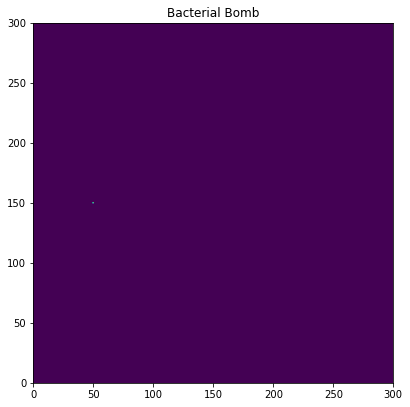

Starting location of the bacterial bomb (x: 50, y: 150)


interactive(children=(IntSlider(value=1000, description='Bacteria Number', max=10000, min=10, step=10), IntSli…

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import random
random.seed(10) # Enable to debug
import ipywidgets as widgets
from IPython.display import display # Maybe not needed

# DEFINE FUNCTIONS:
# 1. Set up North-East-West-South movement function:
def news_move(a, pns, pn, pw):
    if random.random() <= pns: # probability of moving north or south
        if random.random() <= pn:
            a[1] += 1 # Blow north
        else: # if rand > pn
            a[1] -= 1 # Blow south
    else: # if random > pns
        if random.random() <= pw:
            a[0] -= 1 # Blow west
        else: # if rand > pw
            a[0] += 1 # Blow east

# 2. Up_Down movement function:
def ud_move(a, pud, pu):
    if random.random() <= pud: # prob of moving up or down if height >= z0 (Building height)
        if random.random() <= pu:
            a[2] += 1 # Rise by 1 metre/second
        else: # if random > pu
            a[2] -= 1 # Drop by 1 metre/second
    else: # if random > pud
        a[2] = a[2] # Stay the same

# 3. Distance function:
def dist(ax, bx, ay, by):
    return (((ax - bx)**2) + ((ay - by)**2))**0.5

# Set up variables to be called by the boom function:
b_map = []
bact = []
den_map = []
den_map2 = []
fin_param = []
most_con = 0
# Most concentrated bacteria deposit coordinates
x_m = 0
y_m = 0
no_bact = 0 # no of bacteria
# Headquarter coordinates
x_h = 0
y_h = 0

# Read bacterial bomb file:
with open('wind.raster', newline='') as f:
    map_r = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
    for row in map_r:
        map_list = []
        for value in row:
            map_list.append(value)
        b_map.append(map_list)

# Display bacteria bomb location density map:
fig = plt.figure(figsize=(5, 5))    
ax = fig.add_axes([0, 0, 1, 1])
plt.title('Bacterial Bomb')
plt.ylim(0, 300)
plt.xlim(0, 300)
plt.imshow(b_map)
plt.show();

# Find location of bacterial bomb:
for i in range(len(b_map)):
    for j in range (len(b_map[i])):
        if b_map[i][j] > 0:
            x0 = j
            y0 = i
print(f'Starting location of the bacterial bomb (x: {x0}, y: {y0})')

# Bacterial bomb detonation function:
def boom(bn, z0, pns, pn, pw, pud, pu, xh, yh):      
    
    # Clear lists and variables before running again
    bact.clear()
    den_map.clear()
    den_map2.clear()
    fin_param.clear()
    global most_con
    global x_m
    global y_m
    global no_bact
    global x_h
    global y_h
    most_con = 0
    x_m = 0
    y_m = 0
    no_bact = bn
    x_h = xh
    y_h = yh
    
    # Print Initial Conditions
    print('Model is run with the following settings:')
    print(f'1) Bacteria Number: {no_bact}')
    print(f'2) Building Height: {z0}m')
    print(f'3.a) P North/South: {pns:.2f}')
    print(f'---> P North: {pn:.2f}, P South: {1-pn:.2f}')
    print(f'3.b) P West/East: {1-pns:.2f}')
    print(f'---> P West: {pw:.2f}, P East: {1-pw:.2f}')
    print(f'4.a) P Up/Down: {pud:.2f} (If bacteria >= {z0}m)')
    print(f'---> P Up: {pu:.2f}, P Down: {1-pu:.2f}') 
    print(f'4.b) P Stay Same: {1-pud:.2f} (If bacteria >= {z0}m)')
    print(f'5) Headquarter Location: (x:{x_h}, y:{y_h})')
    
    # Create Bacteria bomb
    for i in range(no_bact):
        bact.append([x0, y0, z0])
    # print(bact)
    
    # Bomb detonation
    for i in range(no_bact):
        carry_on = True
        it = 0 # -1 is not used because I don't want to count 0 for time
        while carry_on: # 1 it = 1 second
            it += 1
            if bact[i][2] >= z0: #above the building height         
                ud_move(bact[i], pud, pu)
                news_move(bact[i], pns, pn, pw)

            elif 0 < bact[i][2] < z0:
                bact[i][2] -= 1 # Fall by 1 metre/second           
                news_move(bact[i], pns, pn, pw)

            else: # if bact[i][2] = 0:   
                bact[i][2] = bact[i][2]
                carry_on = False
                # break # Break as already hit the ground! # Not needed with while loop

        if carry_on == False:
            xf = bact[i][0] # Final coordinates
            yf = bact[i][1]
            zf = bact[i][2] # To see if working properly (if all landed to ground)
            fin_param.append([i, it, xf, yf, zf]) # Not needed actually but to store time (it) and count (i) as well
            # continue # continue to next bacteria # Not needed with while loop
    # print(fin_param)
    
    # Create new density map
    for i in range(len(b_map)):
        dm2 = []
        for j in range(len(b_map[i])):
            dm2.append(0)
        den_map.append(dm2)
    for i in range(len(bact)):
        if (0 <= bact[i][0] <= len(den_map[0])) and (0 <= bact[i][1] <= len(den_map)):
            x = bact[i][0]
            y = bact[i][1]
            den_map[y][x] += 1
    # print(den_map)
    # print(len(den_map))
    # print(len(den_map[0]))
       
    # FIND MOST CONCENTRATED BACTERIA DEPOSITION FROM THE len(b_map)xlen(den_map[0])m2 DENSITY MAP:
    for i in range(len(den_map)): # y = i
        for j in range (len(den_map[i])): # x = j
            if den_map[i][j] > most_con:
                most_con = den_map[i][j]
                x_m = j
                y_m = i  
       
    # PLOT VISUALS:
    # 1. Plot bacteria scatter plot after spread and landing
    fig = plt.figure(figsize=(5, 5))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacteria Scatter Plot')
    plt.ylim(0, len(den_map))
    plt.xlim(0, len(den_map[0]))
    plt.scatter(x0, y0, marker='X',color='blue') # Bomb site
    for i in range(no_bact):
        plt.scatter(bact[i][0], bact[i][1], s=3, marker=',', color='orange', alpha=0.1)
    plt.scatter(x_h, y_h, marker='h', color='red') # Headquarter location
    plt.scatter(x_m, y_m, marker='v', color='black') # Most concentrated bacterial deposit WITHIN the area of the town
    plt.show();
    
    # 2. Plot full bacterial scatter plot
    fig = plt.figure(figsize=(5, 5))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacteria Scatter Plot Full')
    # plt.ylim(0, 300)
    # plt.xlim(0, 300)
#     plt.scatter(x0, y0, marker='X',color='blue') # Bomb site
    for i in range(no_bact): # Bacterial deposits
        plt.scatter(bact[i][0], bact[i][1], marker=',', color='orange', alpha=0.2)
#     plt.scatter(x_h, y_h, marker='h', color='red') # Headquarter location
    plt.scatter(x_m, y_m, marker='v', color='black') # Most concentrated bacterial deposit WITHIN the area of the town
    plt.show();
    
    # 3. Display new bacterial density map:
    fig = plt.figure(figsize=(5, 5))    
    ax = fig.add_axes([0, 0, 1, 1])
    plt.title('Bacterial Spread Density Map')
    plt.ylim(0, len(den_map))
    plt.xlim(0, len(den_map[0]))
    plt.imshow(den_map)
    plt.show();
         
    # SAVE BACTERIAL SPREAD DENSITY MAP AS A CSV FILE:
    with open('bac_den_map.csv', 'w', newline='') as f:     
       den_m_w = csv.writer(f)     
       for row in den_map:         
            den_m_w.writerow(row)
    
    # Read the saved map to compare
    d2 = []
    with open('bac_den_map.csv', newline='') as f:
        d2_r = csv.reader(f, quoting=csv.QUOTE_NONNUMERIC)
        for row in d2_r:
            dm2 = []
            for value in row:
                dm2.append(value)
            d2.append(dm2)
    # print('Death2', d2)
    # print(len(d2))
    # print(len(d2[0]))
    print('Equalily:', den_map == d2)
            
#     # FIND THE MIN AND MAX IN EACH DIRECTION:
#     # Lambda keyword code taken from https://dbader.org/blog/python-min-max-and-nested-lists
#     min_y = min(bact, key=lambda x: x[1])
#     print('min_y', min_y)
#     max_y = max(bact, key=lambda x: x[1])
#     print('max_y', max_y)
#     min_x = min(bact, key=lambda x: x[0])
#     print('min_x', min_x)
#     max_x = max(bact, key=lambda x: x[0])
#     print('max_x', max_x)
        
# SLIDER WIDGETS:
bac_wg = widgets.IntSlider(description='Bacteria Number', min=10, max=10000, step=10, value=1000)

z_wg = widgets.IntSlider(description='Building Height', min=5, max=150, step=5, value=75)
zi_wg = widgets.FloatSlider()
widgets.jslink((z_wg, 'value'), (zi_wg, 'value'))

pns_wg = widgets.FloatSlider(description='P North/South', min=0.0, max=1.0, step=0.05, value=0.2)
pn_wg = widgets.FloatSlider(description='P North', min=0.0, max=1.0, step=0.05, value=0.5)
pw_wg = widgets.FloatSlider(description='P West', min=0.0, max=1.0, step=0.05, value=0.0625)
pud_wg = widgets.FloatSlider(description='P Up/Down', min=0.0, max=1.0, step=0.05, value=0.9)
pu_wg = widgets.FloatSlider(description='P Up', min=0.0, max=1.0, step=0.05, value=0.222)

xh_wg = widgets.FloatSlider(description='Headquarter X', min=0.0, max=len(b_map[0]), step=0.05, value=len(b_map[0])/2)
yh_wg = widgets.FloatSlider(description='Headquarter Y', min=0.0, max=len(b_map), step=0.05, value=len(b_map)/2)

widgets.interact_manual.opts['manual_name'] = 'Run Model'                   
widgets.interact_manual(boom, bn=bac_wg, z0=z_wg, pns=pns_wg, pn=pn_wg, pw=pw_wg, pud=pud_wg, pu=pu_wg, xh=xh_wg, yh=yh_wg);

In [36]:
# Sort out bacteria according to how quickly they landed on the ground
# Lambda keyword code taken from https://dbader.org/blog/python-min-max-and-nested-lists
sort_fp = sorted(fin_param, key=lambda x: x[1])
# print(sort_fp)

print('Model results:')
print(f'- Most number ({most_con}) of bacteria deposited at (x: {x_m}, y: {y_m}) within the {len(den_map)}X{len(den_map[0])}m2 area of the town')

# Print out details of each bateria sorted according to time taken to land to ground
bact_count = 0 # not -1 as I don't want to count 0
for i in range(len(sort_fp)):
    if (0 <= sort_fp[i][2] <= len(den_map[0])) and (0 <= sort_fp[i][3] <= len(den_map)):
        bact_count += 1
#        # Enable the print below to print the details for each bacteria deposited in the town
#         print(f'Bacteria {sort_fp[i][0]}: Time(sec): {sort_fp[i][1]}, '\
#               f'x: {sort_fp[i][2]}, '\
#               f'y: {sort_fp[i][3]}, '\
#               f'z: {sort_fp[i][4]}')

if no_bact == bact_count:
    print(f'- All bacteria ({bact_count}/{no_bact}) landed within the {len(den_map[0])}X{len(den_map)}m2 area of the town.')
else:
    print(f'- {bact_count} - out of the total {no_bact} - bacteria landed within the {len(den_map[0])}X{len(den_map)}m2 area of the town.')

# DISTANCE CALCULATION:
# print(x_h, y_h) # Headquarter location
# print(x_m, y_m) # Most concentrated bacteri deposit location
# print(x0, y0) # Bomb site location
# Between headquarter location (x_h, y_h) and most concentrated bacterial deposit (x_m, y_m)
dist_h_m = dist(x_h, x_m, y_h, y_m)
# Between headquarter location (x_h, y_h) and bomb location (x0, y0)
dist_h_0 = dist(x_h, x0, y_h, y0)
# Between bomb location (x0, y0) and most concentrated bacterial deposit (x_m, y_m)
dist_0_m = dist(x0, x_m, y0, y_m)
# Print the distances
print(f'- Distance between Headquarter & Bomb location: {dist_h_0:.2f}m')
print(f'- Distance between Headquarter & Most concentrated bacterial deposit: {dist_h_m:.2f}m')
print(f'- Distance between Bomb location & Most concentrated bacterial deposit: {dist_0_m:.2f}m')


Model results:
- Most number (20) of bacteria deposited at (x: 102, y: 151) within the 300X300m2 area of the town
- All bacteria (1000/1000) landed within the 300X300m2 area of the town.
- Distance between Headquarter & Bomb location: 100.00m
- Distance between Headquarter & Most concentrated bacterial deposit: 48.01m
- Distance between Bomb location & Most concentrated bacterial deposit: 52.01m


In [9]:
print(no_bact)

1000


170.3 112.3
102 151
50 150


78.50210188268848